# Game Recommendation System
---

### Fetch data (RAWG API) and perform basic EDA:
  - This notebook only handles data collection along with basic EDA and Data Cleaning on the collected data.

#### Workflow:
 - Collect data using RAWG API (Fetch metadata "results": such as id, name, background image, rating, playtime | "platform": name, requirements(minimum, maximum), genres, screenshots, trailer url, esrb rating, metacritic, stores, tags.)
 - Perform basic EDA & Data Cleaning:
   - Understand Data Structure
   - Explore the Data
   - Handle missing/outlier values
   - Drop duplicate values

---

In [ ]:
# Import required libraries:
import requests
from dotenv import load_dotenv
import os
import json

# Load API KEY:
load_dotenv("api_key1.env")

api_key = os.getenv("RAWG_API_KEY")

# URL:
url = "https://api.rawg.io/api/games"
# params:
params = {
    'key': api_key
}

# GET response:
response = requests.get(url=url,params=params)
if response.status_code == 200:
    print(f"Established successfull connection: {response.status_code}")
    data = response.json()
    print(json.dumps(data, indent=4))
else:
    print("Failed connection.")

Established successfull connection: 200
{
    "count": 885968,
    "next": "https://api.rawg.io/api/games?key=464ed417285740748caaaf7e08ba2427&page=2",
    "previous": null,
    "results": [
        {
            "id": 3498,
            "slug": "grand-theft-auto-v",
            "name": "Grand Theft Auto V",
            "released": "2013-09-17",
            "tba": false,
            "background_image": "https://media.rawg.io/media/games/20a/20aa03a10cda45239fe22d035c0ebe64.jpg",
            "rating": 4.47,
            "rating_top": 5,
            "ratings": [
                {
                    "id": 5,
                    "title": "exceptional",
                    "count": 4251,
                    "percent": 59.0
                },
                {
                    "id": 4,
                    "title": "recommended",
                    "count": 2356,
                    "percent": 32.7
                },
                {
                    "id": 3,
                    "title

### Fetched the above JSON file to understand the metadata of games that needs to be scraped for the recommendation engine:
 - 1. id
 - 2. title
 - 3. released
 - 4. rating
 - 5. playtime
 - 6. genres
 - 7. platforms
 - 8. short_screenshots
 - 9. trailer_url
 - 10. description_raw
 - 11. esrb_rating
 - 12. metacritic
 - 13. background_image
 - 14. pc_requirements_min
 - 15. pc_requirements_max
 - 16. stores
 - 17. tags

---

## Collecting Data:

In [11]:
## Collecting Games for PS4 and XBOX ONE [2015 - 2020]

import requests
from dotenv import load_dotenv
import os
import time
import pandas as pd

# Define API KEY and parameters:
load_dotenv("api_key1.env")           # Load API KEY from env file
api_key = os.getenv("RAWG_API_KEY")
platforms = "18,1,16,14"                    # PS4 & XBOX ONE
ordering = "-released,-rating"        # Sort via latest released and highest rating games
pages = 249                           # Total number of pages

# Empty list to append data:
all_games = []

# Loop through pages to fetch data:
for page in range(1,pages+1):
    # Make the request to the RAWG API:
    url = f"https://api.rawg.io/api/games?key={api_key}&platforms={platforms}&ordering={ordering}&page={page}&page_size=40"
    response = requests.get(url)
    if response.status_code == 200:
        # Access the "results" key, which contains the list of games:
        games = response.json().get("results", [])

        # Extract specific fields from each game:
        for game in games:
            rating = game.get("rating", 0)
            if rating > 0.0:
                game_data = {
                    "id": game.get("id",None),
                    "title": game.get("name",None),
                    "rating": rating,
                    "released": game.get("released",None)
                }

                all_games.append(game_data)               # Add the extracted game data to the list

        # Progress tracking print statement added here
        print(f"✅ Fetched page {page}/{pages} — Total games so far: {len(all_games)}")

        # Pause for a minute to respect rate limit:
        if page % 100 == 0:
            print("⏸️ Hit 4,000 games — sleeping for 60 seconds to stay under rate limit...")
            time.sleep(60)
    else:
        print(f"Error fetching page {page}: {response.status_code}")
        break
    
    time.sleep(0.3)

# Create DataFrame:
df = pd.DataFrame(all_games)
# Save to CSV file:
df.to_csv("games_data_batch1.csv", index=False)
print(f"Saved Batch 1: {len(df)} games (2015-2020) to games_data_batch1.csv")

✅ Fetched page 1/249 — Total games so far: 40
✅ Fetched page 2/249 — Total games so far: 80
✅ Fetched page 3/249 — Total games so far: 120
✅ Fetched page 4/249 — Total games so far: 160
✅ Fetched page 5/249 — Total games so far: 200
✅ Fetched page 6/249 — Total games so far: 240
✅ Fetched page 7/249 — Total games so far: 280
✅ Fetched page 8/249 — Total games so far: 320
✅ Fetched page 9/249 — Total games so far: 360
✅ Fetched page 10/249 — Total games so far: 400
✅ Fetched page 11/249 — Total games so far: 440
✅ Fetched page 12/249 — Total games so far: 480
✅ Fetched page 13/249 — Total games so far: 520
✅ Fetched page 14/249 — Total games so far: 560
✅ Fetched page 15/249 — Total games so far: 600
✅ Fetched page 16/249 — Total games so far: 640
✅ Fetched page 17/249 — Total games so far: 680
✅ Fetched page 18/249 — Total games so far: 720
✅ Fetched page 19/249 — Total games so far: 760
✅ Fetched page 20/249 — Total games so far: 800
✅ Fetched page 21/249 — Total games so far: 840
✅ F

In [12]:
## Collecting Games for PS4, XBOX ONE, PS5, XBOX SERIES S/X and PC [2020 - 2025]

import requests
from dotenv import load_dotenv
import os
import time
import pandas as pd

# Define API KEY and parameters:
load_dotenv("api_key3.env")
api_key = os.getenv("RAWG_API_KEY")
platforms = "187,186,4"
ordering = "-released,-rating"
pages = 249

# Empty list to append data:
all_games = []

# Loop through pages to fetch data:
for page in range(1,pages+1):
    # Make the request to the RAWG API:
    url = f"https://api.rawg.io/api/games?key={api_key}&platforms={platforms}&ordering={ordering}&page={page}&page_size=40"
    response = requests.get(url)
    if response.status_code == 200:
        # Access the "results" key, which contains the list of games:
        games = response.json().get("results", [])

        # Extract specific fields from each game:
        for game in games:
            rating = game.get("rating",0)
            if rating > 0.0:
                game_data = {
                    "id": game.get("id",None),
                    "title": game.get("name",None),
                    "rating": rating,
                    "released": game.get("released",None)
                }

                all_games.append(game_data)               # Add the extracted game data to the list

        # Progress tracking print statement added here
        print(f"✅ Fetched page {page}/{pages} — Total games so far: {len(all_games)}")

        # Sleep for a minute there once completed fetching 4K games:
        if page % 100 == 0:
            print("⏸️ Hit 4,000 games — sleeping for 60 seconds to stay under rate limit...")
            time.sleep(60)
    else:
        print(f"Error fetching page {page}: {response.status_code}")
        break
    
    time.sleep(0.3)

# Create DataFrame:
df = pd.DataFrame(all_games)
# Save to CSV file:
df.to_csv("games_data_batch2.csv", index=False)
print(f"Saved Batch 2: {len(df)} games (2020-2025) to games_data_batch2.csv")

✅ Fetched page 1/249 — Total games so far: 40
✅ Fetched page 2/249 — Total games so far: 80
✅ Fetched page 3/249 — Total games so far: 120
✅ Fetched page 4/249 — Total games so far: 160
✅ Fetched page 5/249 — Total games so far: 200
✅ Fetched page 6/249 — Total games so far: 240
✅ Fetched page 7/249 — Total games so far: 280
✅ Fetched page 8/249 — Total games so far: 320
✅ Fetched page 9/249 — Total games so far: 360
✅ Fetched page 10/249 — Total games so far: 400
✅ Fetched page 11/249 — Total games so far: 440
✅ Fetched page 12/249 — Total games so far: 480
✅ Fetched page 13/249 — Total games so far: 520
✅ Fetched page 14/249 — Total games so far: 560
✅ Fetched page 15/249 — Total games so far: 600
✅ Fetched page 16/249 — Total games so far: 640
✅ Fetched page 17/249 — Total games so far: 680
✅ Fetched page 18/249 — Total games so far: 720
✅ Fetched page 19/249 — Total games so far: 760
✅ Fetched page 20/249 — Total games so far: 800
✅ Fetched page 21/249 — Total games so far: 840
✅ F

In [ ]:
# Load both the dataset and merge based on ID column:

batch1 = pd.read_csv("games_data_batch1.csv")    # Contains PS3,PS4,XBOX 360, XBOX ONE Games
batch2 = pd.read_csv("games_data_batch2.csv")    # Contains PS5,XBOX SERIES S/X AND PC Games

# Check information of the data:
info_batch1 = batch1.info()
print("\n---\n")
info_batch2 = batch2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5837 non-null   int64  
 1   title     5837 non-null   object 
 2   rating    5837 non-null   float64
 3   released  5815 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 182.5+ KB

---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8388 non-null   int64  
 1   title     8388 non-null   object 
 2   rating    8388 non-null   float64
 3   released  8283 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.3+ KB


In [ ]:
# Merge the data:
combined = pd.concat([batch1, batch2], ignore_index=True)
# Check for duplicate values:
print(combined.duplicated().sum())
# Drop the duplicate rows subset = ID:
combined.drop_duplicates(subset='id', inplace=True)

In [29]:
# Upload the combined data to a csv file:
combined.to_csv("Games_Data.csv", index=False)
print("Successfully Saved.")

Successfully Saved.


In [30]:
# Load and check for missing values:
games = pd.read_csv("Games_Data.csv")

# Information of games:
games.info()

# Missing values of games:
games.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10919 entries, 0 to 10918
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10919 non-null  int64  
 1   title     10919 non-null  object 
 2   rating    10919 non-null  float64
 3   released  10793 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 341.3+ KB


id            0
title         0
rating        0
released    126
dtype: int64

In [31]:
# Fillna to released column with "not available"
games['released'] = games['released'].fillna("not available")

# Preview the data:
games.head(10)

,id,title,rating,released
0,3498,Grand Theft Auto V,4.47,2013-09-17
1,3328,The Witcher 3: Wild Hunt,4.64,2015-05-18
2,4200,Portal 2,4.59,2011-04-18
3,4291,Counter-Strike: Global Offensive,3.57,2012-08-21
4,5286,Tomb Raider (2013),4.06,2013-03-05
5,13536,Portal,4.49,2007-10-09
6,12020,Left 4 Dead 2,4.09,2009-11-17
7,5679,The Elder Scrolls V: Skyrim,4.42,2011-11-11
8,28,Red Dead Redemption 2,4.59,2018-10-26
9,4062,BioShock Infinite,4.38,2013-03-26


In [39]:
# Save the updated Games_Data:
games.to_csv("Games_Data.csv", index=False)
print("Saved")

Saved


In [41]:
# Load and check for missing values:
games = pd.read_csv("Games_Data.csv")

In [36]:
# Look up details of the game using a game id:
import requests
import json
import os
from dotenv import load_dotenv

load_dotenv("../API_KEY/api_key1.env")
api_key = os.getenv("RAWG_API_KEY")

url = f"https://api.rawg.io/api/games/{7689}?key={api_key}"

# GET Response:
response = requests.get(url)
if response.status_code == 200:
    print("Connection valid.")
    data = response.json()
    print(json.dumps(data, indent=4))
else:
    print("Invalid Connection.")


Connection valid.
{
    "id": 7689,
    "slug": "rise-of-the-tomb-raider",
    "name": "Rise of the Tomb Raider",
    "name_original": "Rise of the Tomb Raider",
    "description": "<p>Rise of the Tomb Raider is the eleventh entry in the franchise, being a sequel to its predecessor, Tomb Raider, a reboot of the franchise. This story follows Lara Croft, one year after battling her supernatural experiences in Yamatai. This time she is trying to find the legendary city of Kitezh in Siberia, Russia. The legend behind the city begins in the 12th century and still comes nowadays, that this ancient city grants with a promise of immortality. While Lara tries to solve the mystery of Siberia, she encounters an organisation called Trinity. They want to retrieve this gift to themselves. Following the notes of her father, Lara tries to discover the secrets of the ancient city and stop Trinity in doing so.</p>\n<p>Exploring the Soviet motive, even more, the game has the DLC&#39;s - Baba Yaga, the Te

In [1]:
# Fetching additional details:
import requests
import os
import time
from dotenv import load_dotenv
import pandas as pd

# Load the Games_Data.csv
games = pd.read_csv("Games_Data.csv")

# Prepare the .env file paths
env_files = ["api_key1.env", "api_key2.env"]
api_keys = []

# Load both API keys
for env_file in env_files:
    load_dotenv(env_file)
    api_keys.append(os.getenv("RAWG_API_KEY"))

# Define URL and initialize
base_url = "https://api.rawg.io/api/games/"
game_details = []

SAVE_EVERY = 100
SLEEP_EVERY = 500
total_games = len(games)

# Loop through game IDs
for idx, game_id in enumerate(games['id'], start=1):
    # Rotate API key every 500 requests
    current_key = api_keys[(idx // 500) % len(api_keys)]

    try:
        url = f"{base_url}{game_id}?key={current_key}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()

            game_details.append({
                'id': game_id,
                'background_image_url': data.get('background_image'),
                'website': data.get('website'),
                'ratings': [r.get('title') for r in data.get('ratings', [])] if data.get('ratings') else None,
                'store': [(s['store'].get('name'), s['store'].get('domain')) 
                        for s in data.get('stores', []) if 'store' in s] if data.get('stores') else None,
                'developers': [dev.get('name') for dev in data.get('developers', [])] if data.get('developers') else None,
                'genres': [g.get('name') for g in data.get('genres', [])] if data.get('genres') else None,
                'tags': [t.get('name') for t in data.get('tags', [])] if data.get('tags') else None,
                'publishers': [pub.get('name') for pub in data.get('publishers', [])] if data.get('publishers') else None,
                'esrb_rating': data.get('esrb_rating', {}).get('name') if data.get('esrb_rating') else None,
                'description': data.get('description_raw')
            })

            percent = (idx / total_games) * 100
            print(f"✅ [{idx}/{total_games}] {percent:.2f}% - Fetched Game ID {game_id}")

        else:
            print(f"❌ [{idx}/{total_games}] Failed to fetch Game ID {game_id} | Status Code {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"⚠️ [{idx}/{total_games}] Error fetching Game ID {game_id} due to: {e}")

    time.sleep(0.4)

    # Save batch every SAVE_EVERY
    if idx % SAVE_EVERY == 0:
        df_temp = pd.DataFrame(game_details)
        if os.path.exists("Details_Data.csv"):
            df_temp.to_csv("Details_Data.csv", mode="a", header=False, index=False)
        else:
            df_temp.to_csv("Details_Data.csv", index=False)
        print(f"💾 Auto-saved {len(df_temp)} records to Details_Data.csv ✅")
        game_details.clear()

    # Sleep long after SLEEP_EVERY
    if idx % SLEEP_EVERY == 0:
        print(f"😴 Processed {idx} games. Taking a 60 sec nap to respect rate limits...")
        time.sleep(60)

# Final save
if game_details:
    df = pd.DataFrame(game_details)
    if os.path.exists("Details_Data.csv"):
        df.to_csv("Details_Data.csv", mode="a", header=False, index=False)
    else:
        df.to_csv("Details_Data.csv", index=False)

print(f"\n🎉 Done! All game details fetched and saved successfully.")

✅ [1/10919] 0.01% - Fetched Game ID 3498
✅ [2/10919] 0.02% - Fetched Game ID 3328
✅ [3/10919] 0.03% - Fetched Game ID 4200
✅ [4/10919] 0.04% - Fetched Game ID 4291
✅ [5/10919] 0.05% - Fetched Game ID 5286
✅ [6/10919] 0.05% - Fetched Game ID 13536
✅ [7/10919] 0.06% - Fetched Game ID 12020
✅ [8/10919] 0.07% - Fetched Game ID 5679
✅ [9/10919] 0.08% - Fetched Game ID 28
✅ [10/10919] 0.09% - Fetched Game ID 4062
✅ [11/10919] 0.10% - Fetched Game ID 13537
✅ [12/10919] 0.11% - Fetched Game ID 802
✅ [13/10919] 0.12% - Fetched Game ID 3439
✅ [14/10919] 0.13% - Fetched Game ID 4286
✅ [15/10919] 0.14% - Fetched Game ID 32
✅ [16/10919] 0.15% - Fetched Game ID 58175
✅ [17/10919] 0.16% - Fetched Game ID 3070
✅ [18/10919] 0.16% - Fetched Game ID 3939
✅ [19/10919] 0.17% - Fetched Game ID 1030
✅ [20/10919] 0.18% - Fetched Game ID 2454
✅ [21/10919] 0.19% - Fetched Game ID 41494
✅ [22/10919] 0.20% - Fetched Game ID 422
✅ [23/10919] 0.21% - Fetched Game ID 766
✅ [24/10919] 0.22% - Fetched Game ID 4459
✅ [

In [10]:
import pandas as pd

# Check the Details Data:
details = pd.read_csv("Details_Data.csv")

# Info on Data:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10902 entries, 0 to 10901
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10902 non-null  int64 
 1   background_image_url  10875 non-null  object
 2   website               8133 non-null   object
 3   ratings               10902 non-null  object
 4   store                 10318 non-null  object
 5   developers            10768 non-null  object
 6   genres                10758 non-null  object
 7   tags                  10404 non-null  object
 8   publishers            10611 non-null  object
 9   esrb_rating           5227 non-null   object
 10  description           10633 non-null  object
dtypes: int64(1), object(10)
memory usage: 937.0+ KB


In [11]:
# Checking missing values:
details.isnull().sum()

id                         0
background_image_url      27
website                 2769
ratings                    0
store                    584
developers               134
genres                   144
tags                     498
publishers               291
esrb_rating             5675
description              269
dtype: int64

In [12]:
# Preview the data:
details.head(10)

,id,background_image_url,website,ratings,store,developers,genres,tags,publishers,esrb_rating,description
0,3498,https://media.rawg.io/media/games/20a/20aa03a1...,http://www.rockstargames.com/V/,"['exceptional', 'recommended', 'meh', 'skip']","[('Steam', 'store.steampowered.com'), ('PlaySt...","['Rockstar North', 'Rockstar Games']",['Action'],"['Singleplayer', 'Steam Achievements', 'Multip...",['Rockstar Games'],Mature,"Rockstar Games went bigger, since their previo..."
1,3328,https://media.rawg.io/media/games/618/618c2031...,https://thewitcher.com/en/witcher3,"['exceptional', 'recommended', 'meh', 'skip']","[('GOG', 'gog.com'), ('PlayStation Store', 'st...",['CD PROJEKT RED'],"['Action', 'RPG']","['Singleplayer', 'Full controller support', 'A...",['CD PROJEKT RED'],Mature,"The third game in a series, it holds nothing b..."
2,4200,https://media.rawg.io/media/games/2ba/2bac0e87...,http://www.thinkwithportals.com/,"['exceptional', 'recommended', 'meh', 'skip']","[('Xbox Store', 'microsoft.com'), ('Steam', 's...",['Valve Software'],"['Shooter', 'Puzzle']","['Singleplayer', 'Steam Achievements', 'Multip...","['Electronic Arts', 'Valve']",Everyone 10+,Portal 2 is a first-person puzzle game develop...
3,4291,https://media.rawg.io/media/games/736/73619bd3...,http://blog.counter-strike.net/,"['recommended', 'meh', 'exceptional', 'skip']","[('PlayStation Store', 'store.playstation.com'...","['Valve Software', 'Hidden Path Entertainment']",['Shooter'],"['Steam Achievements', 'Multiplayer', 'Full co...",['Valve'],Mature,Counter-Strike is a multiplayer phenomenon in ...
4,5286,https://media.rawg.io/media/games/021/021c4e21...,http://www.tombraider.com,"['recommended', 'exceptional', 'meh', 'skip']","[('Xbox 360 Store', 'marketplace.xbox.com'), (...",['Crystal Dynamics'],['Action'],"['Singleplayer', 'Multiplayer', 'Full controll...",['Square Enix'],Mature,A cinematic revival of the series in its actio...
5,13536,https://media.rawg.io/media/games/7fa/7fa0b586...,http://www.whatistheorangebox.com/,"['exceptional', 'recommended', 'meh', 'skip']","[('Steam', 'store.steampowered.com'), ('Google...","['Valve Software', 'NVIDIA Lightspeed Studios']","['Action', 'Puzzle']","['Singleplayer', 'Steam Achievements', 'Atmosp...","['Valve', 'Buka Entertainment', 'NVIDIA', 'Cyb...",Teen,Every single time you click your mouse while h...
6,12020,https://media.rawg.io/media/games/d58/d588947d...,http://www.l4d.com,"['recommended', 'exceptional', 'meh', 'skip']","[('Steam', 'store.steampowered.com'), ('Xbox 3...","['Valve Software', 'Turtle Rock Studios']","['Action', 'Shooter']","['Singleplayer', 'Steam Achievements', 'Multip...","['Electronic Arts', 'Valve', 'Akella']",Mature,Cooperative survival continues with a differen...
7,5679,https://media.rawg.io/media/games/7cf/7cfc9220...,http://elderscrolls.com/,"['exceptional', 'recommended', 'meh', 'skip']","[('PlayStation Store', 'store.playstation.com'...",['Bethesda Game Studios'],"['Action', 'RPG']","['Singleplayer', 'Steam Achievements', 'Steam ...",['Bethesda Softworks'],Mature,"The fifth game in the series, Skyrim takes us ..."
8,28,https://media.rawg.io/media/games/511/5118aff5...,https://www.rockstargames.com/reddeadredemption2/,"['exceptional', 'recommended', 'meh', 'skip']","[('PlayStation Store', 'store.playstation.com'...",['Rockstar Games'],['Action'],"['Singleplayer', 'Multiplayer', 'Atmospheric',...",['Rockstar Games'],Mature,"America, 1899. The end of the wild west era ha..."
9,4062,https://media.rawg.io/media/games/fc1/fc1307a2...,https://2k.com/en-US/game/bioshock-infinite,"['exceptional', 'recommended', 'meh', 'skip']","[('Epic Games', 'epicgames.com'), ('App Store'...","['Aspyr Media', '2K Australia', 'Irrational Ga...","['Action', 'Shooter']","['Singleplayer', 'Steam Achievements', 'Full c...","['2K Games', 'Aspyr']",Mature,"The third game in the series, Bioshock takes t..."


In [23]:
def impute(data, columns, fill_value):
    """
    Fills missing values in one or more columns with a given string.
    
    Parameters:
        data (pd.DataFrame): The DataFrame to process.
        columns (str or list): Column name or list of column names.
        fill_value (str): Value to fill in place of NaN.
        
    Returns:
        pd.Series: Null counts in the specified columns after imputation.
    """
    if isinstance(columns, str):
        columns = [columns]
        
    for column in columns:
        data[column] = data[column].fillna(fill_value)
        
    return data[columns].isnull().sum()

In [15]:
# Run the function to fill the missing values:
impute(details,['background_image_url','website','store','developers','genres','tags','publishers','description'],'not available')
impute(details,'esrb_rating','not rated')

esrb_rating    0
dtype: int64

In [17]:
details.head()

,id,background_image_url,website,ratings,store,developers,genres,tags,publishers,esrb_rating,description
0,3498,https://media.rawg.io/media/games/20a/20aa03a1...,http://www.rockstargames.com/V/,"['exceptional', 'recommended', 'meh', 'skip']","[('Steam', 'store.steampowered.com'), ('PlaySt...","['Rockstar North', 'Rockstar Games']",['Action'],"['Singleplayer', 'Steam Achievements', 'Multip...",['Rockstar Games'],Mature,"Rockstar Games went bigger, since their previo..."
1,3328,https://media.rawg.io/media/games/618/618c2031...,https://thewitcher.com/en/witcher3,"['exceptional', 'recommended', 'meh', 'skip']","[('GOG', 'gog.com'), ('PlayStation Store', 'st...",['CD PROJEKT RED'],"['Action', 'RPG']","['Singleplayer', 'Full controller support', 'A...",['CD PROJEKT RED'],Mature,"The third game in a series, it holds nothing b..."
2,4200,https://media.rawg.io/media/games/2ba/2bac0e87...,http://www.thinkwithportals.com/,"['exceptional', 'recommended', 'meh', 'skip']","[('Xbox Store', 'microsoft.com'), ('Steam', 's...",['Valve Software'],"['Shooter', 'Puzzle']","['Singleplayer', 'Steam Achievements', 'Multip...","['Electronic Arts', 'Valve']",Everyone 10+,Portal 2 is a first-person puzzle game develop...
3,4291,https://media.rawg.io/media/games/736/73619bd3...,http://blog.counter-strike.net/,"['recommended', 'meh', 'exceptional', 'skip']","[('PlayStation Store', 'store.playstation.com'...","['Valve Software', 'Hidden Path Entertainment']",['Shooter'],"['Steam Achievements', 'Multiplayer', 'Full co...",['Valve'],Mature,Counter-Strike is a multiplayer phenomenon in ...
4,5286,https://media.rawg.io/media/games/021/021c4e21...,http://www.tombraider.com,"['recommended', 'exceptional', 'meh', 'skip']","[('Xbox 360 Store', 'marketplace.xbox.com'), (...",['Crystal Dynamics'],['Action'],"['Singleplayer', 'Multiplayer', 'Full controll...",['Square Enix'],Mature,A cinematic revival of the series in its actio...


In [18]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10902 entries, 0 to 10901
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10902 non-null  int64 
 1   background_image_url  10902 non-null  object
 2   website               10902 non-null  object
 3   ratings               10902 non-null  object
 4   store                 10902 non-null  object
 5   developers            10902 non-null  object
 6   genres                10902 non-null  object
 7   tags                  10902 non-null  object
 8   publishers            10902 non-null  object
 9   esrb_rating           10902 non-null  object
 10  description           10902 non-null  object
dtypes: int64(1), object(10)
memory usage: 937.0+ KB


In [19]:
# Since the missing values have been handled now, will save this data:
details.to_csv("Details_Data.csv", index=False)

In [20]:
# Merge the data files:
games = pd.read_csv("Games_Data.csv")
details = pd.read_csv("Details_Data.csv")

main = pd.merge(games,details,how='left',on='id')   # Merging the data

# Preview the data:
main.head(10)

,id,title,rating,released,background_image_url,website,ratings,store,developers,genres,tags,publishers,esrb_rating,description
0,3498,Grand Theft Auto V,4.47,2013-09-17,https://media.rawg.io/media/games/20a/20aa03a1...,http://www.rockstargames.com/V/,"['exceptional', 'recommended', 'meh', 'skip']","[('Steam', 'store.steampowered.com'), ('PlaySt...","['Rockstar North', 'Rockstar Games']",['Action'],"['Singleplayer', 'Steam Achievements', 'Multip...",['Rockstar Games'],Mature,"Rockstar Games went bigger, since their previo..."
1,3328,The Witcher 3: Wild Hunt,4.64,2015-05-18,https://media.rawg.io/media/games/618/618c2031...,https://thewitcher.com/en/witcher3,"['exceptional', 'recommended', 'meh', 'skip']","[('GOG', 'gog.com'), ('PlayStation Store', 'st...",['CD PROJEKT RED'],"['Action', 'RPG']","['Singleplayer', 'Full controller support', 'A...",['CD PROJEKT RED'],Mature,"The third game in a series, it holds nothing b..."
2,4200,Portal 2,4.59,2011-04-18,https://media.rawg.io/media/games/2ba/2bac0e87...,http://www.thinkwithportals.com/,"['exceptional', 'recommended', 'meh', 'skip']","[('Xbox Store', 'microsoft.com'), ('Steam', 's...",['Valve Software'],"['Shooter', 'Puzzle']","['Singleplayer', 'Steam Achievements', 'Multip...","['Electronic Arts', 'Valve']",Everyone 10+,Portal 2 is a first-person puzzle game develop...
3,4291,Counter-Strike: Global Offensive,3.57,2012-08-21,https://media.rawg.io/media/games/736/73619bd3...,http://blog.counter-strike.net/,"['recommended', 'meh', 'exceptional', 'skip']","[('PlayStation Store', 'store.playstation.com'...","['Valve Software', 'Hidden Path Entertainment']",['Shooter'],"['Steam Achievements', 'Multiplayer', 'Full co...",['Valve'],Mature,Counter-Strike is a multiplayer phenomenon in ...
4,5286,Tomb Raider (2013),4.06,2013-03-05,https://media.rawg.io/media/games/021/021c4e21...,http://www.tombraider.com,"['recommended', 'exceptional', 'meh', 'skip']","[('Xbox 360 Store', 'marketplace.xbox.com'), (...",['Crystal Dynamics'],['Action'],"['Singleplayer', 'Multiplayer', 'Full controll...",['Square Enix'],Mature,A cinematic revival of the series in its actio...
5,13536,Portal,4.49,2007-10-09,https://media.rawg.io/media/games/7fa/7fa0b586...,http://www.whatistheorangebox.com/,"['exceptional', 'recommended', 'meh', 'skip']","[('Steam', 'store.steampowered.com'), ('Google...","['Valve Software', 'NVIDIA Lightspeed Studios']","['Action', 'Puzzle']","['Singleplayer', 'Steam Achievements', 'Atmosp...","['Valve', 'Buka Entertainment', 'NVIDIA', 'Cyb...",Teen,Every single time you click your mouse while h...
6,12020,Left 4 Dead 2,4.09,2009-11-17,https://media.rawg.io/media/games/d58/d588947d...,http://www.l4d.com,"['recommended', 'exceptional', 'meh', 'skip']","[('Steam', 'store.steampowered.com'), ('Xbox 3...","['Valve Software', 'Turtle Rock Studios']","['Action', 'Shooter']","['Singleplayer', 'Steam Achievements', 'Multip...","['Electronic Arts', 'Valve', 'Akella']",Mature,Cooperative survival continues with a differen...
7,5679,The Elder Scrolls V: Skyrim,4.42,2011-11-11,https://media.rawg.io/media/games/7cf/7cfc9220...,http://elderscrolls.com/,"['exceptional', 'recommended', 'meh', 'skip']","[('PlayStation Store', 'store.playstation.com'...",['Bethesda Game Studios'],"['Action', 'RPG']","['Singleplayer', 'Steam Achievements', 'Steam ...",['Bethesda Softworks'],Mature,"The fifth game in the series, Skyrim takes us ..."
8,28,Red Dead Redemption 2,4.59,2018-10-26,https://media.rawg.io/media/games/511/5118aff5...,https://www.rockstargames.com/reddeadredemption2/,"['exceptional', 'recommended', 'meh', 'skip']","[('PlayStation Store', 'store.playstation.com'...",['Rockstar Games'],['Action'],"['Singleplayer', 'Multiplayer', 'Atmospheric',...",['Rockstar Games'],Mature,"America, 1899. The end of the wild west era ha..."
9,4062,BioShock Infinite,4.38,2013-03-26,https://media.rawg.io/media/games/fc1/fc1307a2...,https://2k.com/en-US/game/bioshock-infinite,"['exceptional', 'recommended', 'meh', 'skip']","[('

In [ ]:
# Check information of merged dataset:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10919 entries, 0 to 10918
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10919 non-null  int64  
 1   title                 10919 non-null  object 
 2   rating                10919 non-null  float64
 3   released              10919 non-null  object 
 4   background_image_url  10902 non-null  object 
 5   website               10902 non-null  object 
 6   ratings               10902 non-null  object 
 7   store                 10902 non-null  object 
 8   developers            10902 non-null  object 
 9   genres                10902 non-null  object 
 10  tags                  10902 non-null  object 
 11  publishers            10902 non-null  object 
 12  esrb_rating           10902 non-null  object 
 13  description           10902 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


**The Merged data contains some null values due to the number of Games, will use the function to fill the values**

In [23]:
# Run the function:
impute(main,['background_image_url','website','store','developers','genres','tags','publishers','description'],'not available')
impute(main,['ratings','esrb_rating'],'not rated')

ratings        0
esrb_rating    0
dtype: int64

In [24]:
# Re-check the final data:
main.isnull().sum()

id                      0
title                   0
rating                  0
released                0
background_image_url    0
website                 0
ratings                 0
store                   0
developers              0
genres                  0
tags                    0
publishers              0
esrb_rating             0
description             0
dtype: int64

In [25]:
# Save the finalized data into CSV file:
main.to_csv("Games.csv", index=False)
print("Final data saved.")

Final data saved.


## Basic EDA:
---

In [1]:
# Import the required library:
import pandas as pd

# Load the dataset:
main = pd.read_csv("../data/Games.csv")

In [2]:
# Understanding the structure of the data:
structure = main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10919 entries, 0 to 10918
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10919 non-null  int64  
 1   title                 10919 non-null  object 
 2   rating                10919 non-null  float64
 3   released              10919 non-null  object 
 4   background_image_url  10919 non-null  object 
 5   website               10919 non-null  object 
 6   ratings               10919 non-null  object 
 7   store                 10919 non-null  object 
 8   developers            10919 non-null  object 
 9   genres                10919 non-null  object 
 10  tags                  10919 non-null  object 
 11  publishers            10919 non-null  object 
 12  esrb_rating           10919 non-null  object 
 13  description           10919 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


**Total of 10K rows and 14 columns**

In [3]:
# Check all columns:
columns = main.columns
print(f"All columns:\n{columns}")

All columns:
Index(['id', 'title', 'rating', 'released', 'background_image_url', 'website',
       'ratings', 'store', 'developers', 'genres', 'tags', 'publishers',
       'esrb_rating', 'description'],
      dtype='object')


In [6]:
# Highest rated game:
highest_rated = main.groupby("title")['rating'].mean().sort_values(ascending=False).head(10).reset_index()
print(f"Top 10 Highest Rated Games:\n\n{highest_rated}")

Top 10 Highest Rated Games:

                                        title  rating
0                        The Elder Scrolls VI    4.86
1   The Witcher 3: Wild Hunt – Blood and Wine    4.81
2  The Witcher 3 Wild Hunt - Complete Edition    4.79
3  The Witcher 3: Wild Hunt – Hearts of Stone    4.75
4                             Persona 5 Royal    4.75
5                         Mass Effect Trilogy    4.75
6                 Bloodborne: The Old Hunters    4.73
7             Cyberpunk 2077: Phantom Liberty    4.71
8                   The Last Of Us Remastered    4.69
9                 Clair Obscur: Expedition 33    4.69


In [8]:
# Lowest rated game:
lowest_rated = main.groupby("title")['rating'].mean().sort_values(ascending=True).head(10).reset_index()
print(f"Top 10 Lowest Rated Games:\n\n{lowest_rated}")

Top 10 Lowest Rated Games:

                                        title  rating
0                                     Kabitis    1.00
1  Space Legends: At the Edge of the Universe    1.00
2                             Take Thy Throne    1.00
3        Selfie: Sisters of the Amniotic Lens    1.00
4                        //SNOWFLAKE TATTOO//    1.00
5                       The Corporate Machine    1.00
6                  Think of the Children Beta    1.00
7                      Alien Zombie Megadeath    1.00
8                           Gladiator Trainer    1.00
9                                  Imagine Me    1.17


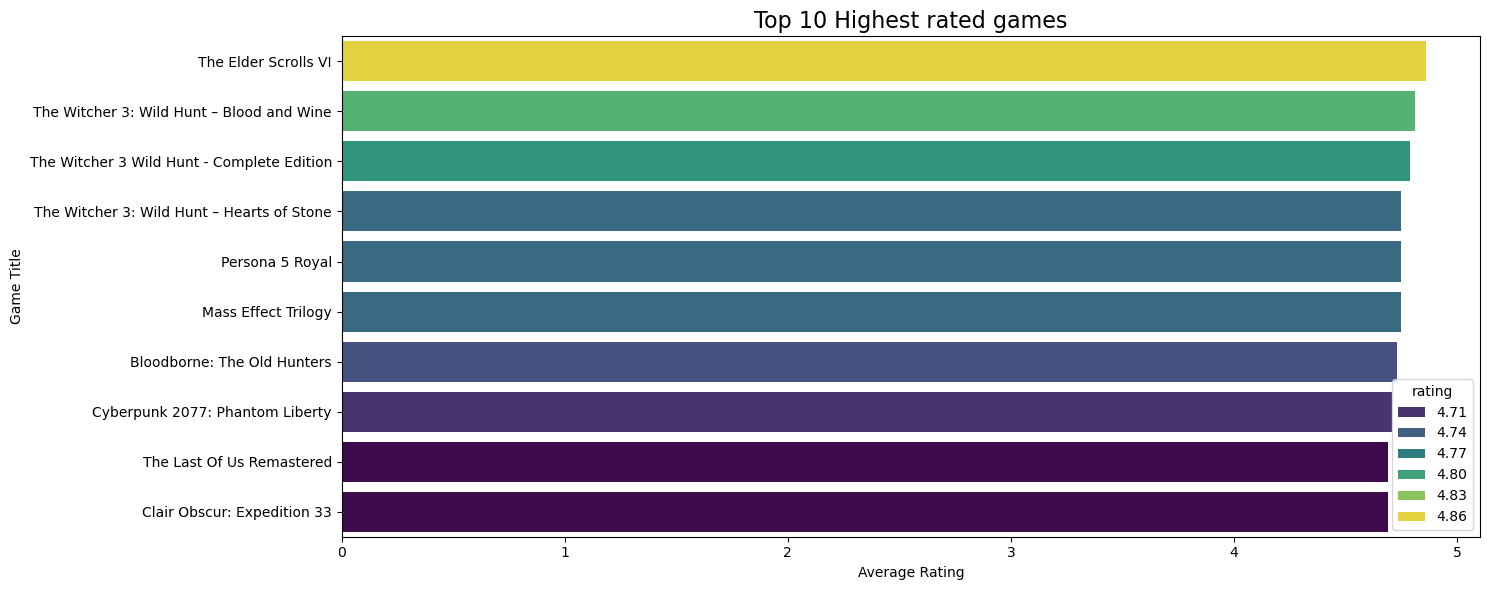

In [12]:
# Visualizing the groupedby details:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot:
plt.figure(figsize=(15,6))
sns.barplot(data=highest_rated,x='rating',y='title',palette='viridis',hue='rating')
plt.title("Top 10 Highest rated games", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

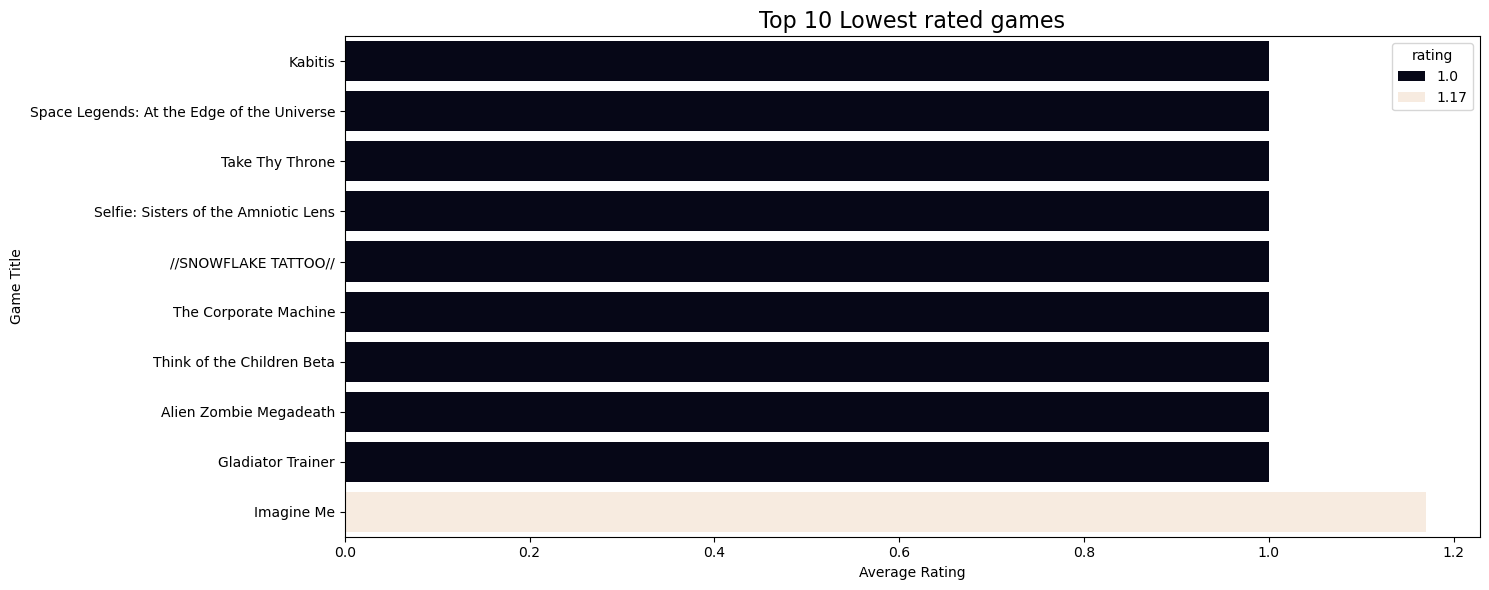

In [14]:
# Set the plot:
plt.figure(figsize=(15,6))
sns.barplot(data=lowest_rated,x='rating',y='title',palette='rocket',hue='rating')
plt.title("Top 10 Lowest rated games", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

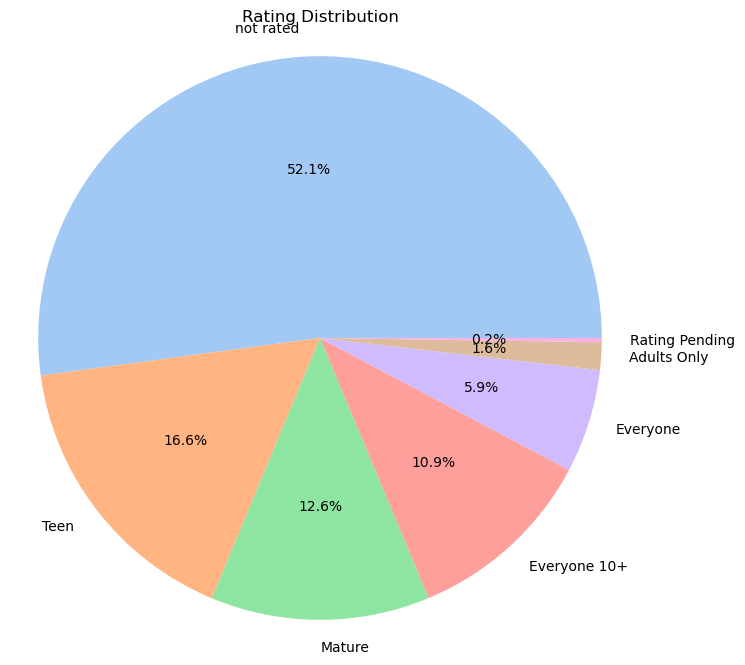

In [31]:
# Pie Chart representation of ESRB Rating:
counts = main['esrb_rating'].value_counts()

# Define parameters:
labels = counts.index
sizes = counts.values
colors = sns.color_palette('pastel')

# Plot the chart:
plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels, autopct="%1.1f%%",colors=colors)
plt.title("Rating Distribution")
plt.axis("equal")
plt.show()

### Fetching additional data for games:

In [ ]:
import requests
import json
from dotenv import load_dotenv
import os

load_dotenv("../Notebooks/api_key3.env")
api_key3 = os.getenv("RAWG_API_KEY")

trailer_url = f"https://api.rawg.io/api/games/{923}/movies?key={api_key3}"
# screenshot_url = f"https://api.rawg.io/api/games/{3498}/screenshots?key={api_key}"

response = requests.get(trailer_url)
if response.status_code == 200:
    print("Successful")
    data = response.json()
    print(json.dumps(data,indent=4))
else:
    print(response.status_code)

Successful
{
    "count": 0,
    "next": null,
    "previous": null,
    "results": []
}


In [ ]:
import aiohttp
import asyncio
import pandas as pd
import os
from dotenv import load_dotenv
import time
import nest_asyncio

nest_asyncio.apply()
load_dotenv("api_key3.env")
api_key = os.getenv("RAWG_API_KEY")

games = pd.read_csv("games_recommended.csv")
total = len(games)
game_media = []

async def fetch_game_media(session, game_id, idx, total):
    trailer_url = f"https://api.rawg.io/api/games/{game_id}/movies?key={api_key}"
    screenshot_url = f"https://api.rawg.io/api/games/{game_id}/screenshots?key={api_key}"

    trailer_link = None
    screenshots = []

    try:
        async with session.get(trailer_url) as response:
            if response.status == 200:
                trailer_data = await response.json()
                if trailer_data['results']:
                    trailer_entry = trailer_data['results'][0]['data']
                    # ✅ Choose max quality if available, else 480p
                    trailer_link = trailer_entry.get('max') or trailer_entry.get('480')

        async with session.get(screenshot_url) as response:
            if response.status == 200:
                shot_data = await response.json()
                screenshots = [shot['image'] for shot in shot_data['results'][:4]]  # Limit to 4

        game_media.append({
            'id': game_id,
            'trailer': trailer_link,
            'screenshots': screenshots
        })

        print(f"[{round((idx + 1) / total * 100, 2)}%] Game ID {game_id} fetched.")

    except Exception as e:
        print(f"[{round((idx + 1) / total * 100, 2)}%] Error fetching Game ID {game_id}: {e}")

    await asyncio.sleep(0.3)
    if (idx + 1) % 400 == 0:
        print("⏳ Rate limit pause for 60s...")
        await asyncio.sleep(60)

async def main():
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_game_media(session, game_id, idx, total) for idx, game_id in enumerate(games['id'])]
        await asyncio.gather(*tasks)

start_time = time.time()
await main()
end_time = time.time()

# Convert to DataFrame and merge
media_df = pd.DataFrame(game_media)
media_df.to_csv("game_trailers_screenshots.csv", index=False)
print("✅ Game media saved.")
print(f"Execution time: {round(end_time - start_time, 2)} seconds")

[0.13%] Game ID 4286 fetched.
[0.34%] Game ID 41 fetched.
[0.25%] Game ID 29028 fetched.
[0.16%] Game ID 3070 fetched.
[0.26%] Game ID 7689 fetched.
[0.11%] Game ID 802 fetched.
[0.27%] Game ID 3287 fetched.
[0.03%] Game ID 4200 fetched.
[0.29%] Game ID 16944 fetched.
[0.22%] Game ID 4459 fetched.
[0.31%] Game ID 11973 fetched.
[0.23%] Game ID 3272 fetched.
[0.12%] Game ID 3439 fetched.
[0.09%] Game ID 4062 fetched.
[0.24%] Game ID 278 fetched.
[0.2%] Game ID 422 fetched.
[0.04%] Game ID 4291 fetched.
[0.05%] Game ID 5286 fetched.
[0.07%] Game ID 5679 fetched.
[0.33%] Game ID 9767 fetched.
[0.01%] Game ID 3498 fetched.
[0.05%] Game ID 13536 fetched.
[0.16%] Game ID 3939 fetched.
[0.02%] Game ID 3328 fetched.
[0.89%] Game ID 25 fetched.
[0.1%] Game ID 13537 fetched.
[0.82%] Game ID 274755 fetched.
[0.14%] Game ID 32 fetched.
[0.93%] Game ID 480 fetched.
[0.4%] Game ID 4252 fetched.
[0.27%] Game ID 3192 fetched.
[0.08%] Game ID 28 fetched.
[0.69%] Game ID 4570 fetched.
[0.88%] Game ID 10

In [ ]:
# Load the dataset and check info:
game_ts = pd.read_csv("game_trailers_screenshots.csv")
game_ts.head()

,id,trailer,screenshots
0,4286,NaN,['https://media.rawg.io/media/screenshots/01f/...
1,41,https://steamcdn-a.akamaihd.net/steam/apps/256...,['https://media.rawg.io/media/screenshots/00a/...
2,29028,NaN,['https://media.rawg.io/media/screenshots/e79/...
3,3070,NaN,['https://media.rawg.io/media/screenshots/f55/...
4,7689,https://steamcdn-a.akamaihd.net/steam/apps/256...,['https://media.rawg.io/media/screenshots/fbf/...


In [ ]:
# Checking for missing values:
game_ts.isnull().sum()

id                0
trailer        8977
screenshots       0
dtype: int64

In [ ]:
# Since the RAWG database has no sufficient data for trailers, will drop the column and keep screenshorts:
game_ts.drop(columns='trailer',axis=1,inplace=True)
# Preview:
game_ts.head()

,id,screenshots
0,4286,['https://media.rawg.io/media/screenshots/01f/...
1,41,['https://media.rawg.io/media/screenshots/00a/...
2,29028,['https://media.rawg.io/media/screenshots/e79/...
3,3070,['https://media.rawg.io/media/screenshots/f55/...
4,7689,['https://media.rawg.io/media/screenshots/fbf/...


In [37]:
# Save the data:
game_ts.to_csv("game_screenshots.csv", index=False)
print("Saved Successfully!")

Saved Successfully!


In [39]:
# Load the main dataframe:
games = pd.read_csv("games_recommended.csv")
# Load the screenshots dataframe:
screenshots = pd.read_csv("game_screenshots.csv")
# Merge the data:
final_game = pd.merge(games, screenshots, how='left', on='id')

# Final Preview:
final_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10914 entries, 0 to 10913
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10914 non-null  int64  
 1   title                 10914 non-null  object 
 2   rating                10914 non-null  float64
 3   released              10788 non-null  object 
 4   background_image_url  10914 non-null  object 
 5   website               10914 non-null  object 
 6   ratings               10914 non-null  object 
 7   store                 10914 non-null  object 
 8   developers            10914 non-null  object 
 9   genres                10914 non-null  object 
 10  tags                  10914 non-null  object 
 11  publishers            10914 non-null  object 
 12  esrb_rating           10914 non-null  object 
 13  description           10914 non-null  object 
 14  title_clean           10914 non-null  object 
 15  store_name         

In [7]:
import ast
# Convert into list and then into normal strings separated by comma:
final_game['screenshots'] = final_game['screenshots'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Convert into normal string url:
final_game['screenshots'] = final_game['screenshots'].apply(lambda x: ", ".join(x))

# Preview:
final_game['screenshots'][5]

NameError: name 'final_game' is not defined

In [ ]:
# Fill null values:
final_game['screenshots'] = final_game['screenshots'].fillna('Not Available')

In [43]:
# Save the final_game to csv:
final_game.to_csv("games_recommended.csv", index=False)
print("Overwritten save.")

Overwritten save.


## Fetching platforms details:

In [14]:
import pandas as pd
games = pd.read_csv("games_recommended.csv")

In [15]:
import aiohttp
import asyncio
import pandas as pd
import os
import time
from dotenv import load_dotenv
import nest_asyncio

nest_asyncio.apply()
load_dotenv("api_key.env")  # Make sure this points to the correct .env file

api_key = '4715d82b27e74dbaa86e320e6e517b1b'
games = pd.read_csv("games_recommended.csv")
total = len(games)
platform_data = []

# Async fetch function
async def fetch_platforms(session, game_id, idx, total):
    url = f"https://api.rawg.io/api/games/{game_id}?key={api_key}"
    try:
        async with session.get(url) as response:
            if response.status == 200:
                data = await response.json()
                platforms = [p['platform']['name'] for p in data.get('platforms', [])]
                platform_data.append({
                    'id': game_id,
                    'platforms': ', '.join(platforms)
                })
                print(f"[{idx + 1}/{total}] ✅ Platforms fetched for game ID: {game_id}")
            else:
                print(f"[{idx + 1}] ❌ HTTP Error {response.status} for game ID: {game_id}")
                platform_data.append({'id': game_id, 'platforms': 'N/A'})
    except Exception as e:
        print(f"[{idx + 1}] ⚠️ Exception for game ID {game_id}: {e}")
        platform_data.append({'id': game_id, 'platforms': 'Error'})

    await asyncio.sleep(0.3)  # respect rate limits
    if (idx + 1) % 400 == 0:
        print("⏳ Pausing for 60 seconds to avoid rate limits...")
        await asyncio.sleep(60)

# Main async executor
async def main():
    async with aiohttp.ClientSession() as session:
        tasks = [
            fetch_platforms(session, game_id, idx, total)
            for idx, game_id in enumerate(games['id'])
        ]
        await asyncio.gather(*tasks)

# Run it
start = time.time()
await main()
end = time.time()

# Save to CSV
game_platforms = pd.DataFrame(platform_data)
game_platforms.to_csv("game_platforms_async.csv", index=False)
print("🎮 Async platform data saved!")
print(f"⏱️ Execution Time: {round(end - start, 2)} seconds")

[3/10914] ✅ Platforms fetched for game ID: 4200
[28/10914] ✅ Platforms fetched for game ID: 7689
[6/10914] ✅ Platforms fetched for game ID: 13536
[25/10914] ✅ Platforms fetched for game ID: 3272
[14/10914] ✅ Platforms fetched for game ID: 4286
[4/10914] ✅ Platforms fetched for game ID: 4291
[13/10914] ✅ Platforms fetched for game ID: 3439
[29/10914] ✅ Platforms fetched for game ID: 3287
[30/10914] ✅ Platforms fetched for game ID: 3192
[12/10914] ✅ Platforms fetched for game ID: 802
[7/10914] ✅ Platforms fetched for game ID: 12020
[11/10914] ✅ Platforms fetched for game ID: 13537
[8/10914] ✅ Platforms fetched for game ID: 5679
[32/10914] ✅ Platforms fetched for game ID: 16944
[10/10914] ✅ Platforms fetched for game ID: 4062
[18/10914] ✅ Platforms fetched for game ID: 3939
[27/10914] ✅ Platforms fetched for game ID: 29028
[24/10914] ✅ Platforms fetched for game ID: 4459
[20/10914] ✅ Platforms fetched for game ID: 2454
[19/10914] ✅ Platforms fetched for game ID: 1030
[16/10914] ✅ Platform

In [ ]:
# Load and check the data:
platforms = pd.read_csv("game_platforms_async.csv")
platforms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10914 non-null  int64 
 1   platforms  10758 non-null  object
dtypes: int64(1), object(1)
memory usage: 170.7+ KB


In [ ]:
# Preview:
platforms['platforms'][0]

'PlayStation 3, PC, Xbox 360, Linux, macOS, Xbox One'

In [24]:
# Impute missing values:
impute(platforms,'platforms','Information not available')
# Re-check:
platforms.isnull().sum()

id           0
platforms    0
dtype: int64

In [26]:
# Save the updated data:
platforms.to_csv("game_platforms_async.csv", index=False)
print("Saved")

Saved


In [28]:
# Load the updated and merge to main DataFrame:
games = pd.read_csv("games_recommended.csv")
pf = pd.read_csv("game_platforms_async.csv")
# Merge:
games_pf = pd.merge(games,pf,how='left',on='id')
# Preview info:
games_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10914 entries, 0 to 10913
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10914 non-null  int64  
 1   title                 10914 non-null  object 
 2   rating                10914 non-null  float64
 3   released              10788 non-null  object 
 4   background_image_url  10914 non-null  object 
 5   website               10914 non-null  object 
 6   ratings               10914 non-null  object 
 7   store                 10914 non-null  object 
 8   developers            10914 non-null  object 
 9   genres                10914 non-null  object 
 10  tags                  10914 non-null  object 
 11  publishers            10914 non-null  object 
 12  esrb_rating           10914 non-null  object 
 13  description           10914 non-null  object 
 14  title_clean           10914 non-null  object 
 15  store_name         

In [29]:
# Saving updated and final data:
games_pf.to_csv("games_recommended.csv", index=False)
print("Saved!")

Saved!
